### **SETUP & IMPORTS**

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vonHeijne_final.tsv to vonHeijne_final.tsv


### **FINAL TSV OF THE MODELS INTO DATAFRAMES**

In [ ]:
vonHeijne = pd.read_csv('vonHeijne_final.tsv', sep='\t')
print(vonHeijne.shape)
print(vonHeijne.head())
print('-'*75)

svm = pd.read_csv('svm_final.tsv', sep='\t')
print(svm.shape)
print(svm.head())

(2006, 9)
   seq_id           Organism  Kingdom  Sequence_length  SP cleavage  \
0  Q62598  Rattus norvegicus  Metazoa              687         17.0   
1  P67788      Manduca sexta  Metazoa               65         19.0   
2  Q8TD06       Homo sapiens  Metazoa              166         21.0   
3  Q99372  Rattus norvegicus  Metazoa              870         27.0   
4  P06865       Homo sapiens  Metazoa              529         22.0   

  N-term transmembrane  class  \
0                  NaN      1   
1                  NaN      1   
2                  NaN      1   
3                  NaN      1   
4                  NaN      1   

                                            Sequence  Prediction  
0  MKTKIIIYICIWATAWAIPVPQLVPLERDIVEKSADVPFLAHPGTA...           0  
1  MYKLTVFLMFIAFVIIAEAQLTFTSSWGGKRAMTNSISCRNDEAIA...           0  
2  MMLHSALGLCLLLVTVSSNLAIAIKKEKRPPQTLSRGWGDDITWVQ...           1  
3  MAGLTAAVPQPGVLLILLLNLLHPAQPGGVPGAVPGGVPGGLPGGV...           1  
4  MTSSRLWFSLLLAAAFAGRATALWPW

### **COMPARISON BETWEEN THE TWO MODELS**
- Extracting true labels and predictions  
- Computing confusion matrices  
- Retrieving TN, FP, FN, TP  
- Printing FP and FN for performance comparison  

In [ ]:
y_test_vH = vonHeijne['class'].to_numpy()
y_pred_vH = vonHeijne['Prediction'].to_numpy()
cm_vH = confusion_matrix(y_test_vH, y_pred_vH)
TN_vH, FP_vH, FN_vH, TP_vH = cm_vH.ravel()

y_test_svm = svm['class'].to_numpy()
y_pred_svm = svm['Prediction'].to_numpy()
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
TN_svm, FP_svm, FN_svm, TP_svm = cm_svm.ravel()

print(f'Confusion matrix von Heijne method:\n {cm_vH}\nFP: {FP_vH}\nFN: {FN_vH}')
print(f'\nConfusion matrix SVM method:\n {cm_svm}\nFP: {FP_svm}\nFN: {FN_svm}')


Confusion matrix von Heijne method:
 [[1707   80]
 [  60  159]]
FP: 80
FN: 60

Confusion matrix SVM method:
 [[1653  134]
 [  23  196]]
FP: 134
FN: 23


### **COMPUTE ERROR RATES FOR TWO CLASSIFIERS**
- Calculating the overall False Positive Rate (OPR) for each method  
- Filtering transmembrane proteins and computing their specific FP rate  
- Comparing FP counts and FP percentages between the two methods  


In [ ]:
#OPR = FP/Neg
OPR_vH = FP_vH/(FP_vH+TN_vH)
OPR_svm = FP_svm/(FP_svm+TN_svm)

#tm_PR = FP(WithTransmembrane)/Neg(WithTransmembrane)
vonHeijne_tm = vonHeijne[vonHeijne['N-term transmembrane'] == True]
print('Transmembrane proteins (von Heijne):', vonHeijne_tm.shape[0])
y_test_vH_tm = vonHeijne_tm['class'].to_numpy()
y_pred_vH_tm = vonHeijne_tm['Prediction'].to_numpy()
TN_vH_tm, FP_vH_tm, tp, fn = confusion_matrix(y_test_vH_tm, y_pred_vH_tm).ravel()

svm_tm = svm[svm['N-term transmembrane'] == True]
print('Transmembrane proteins (svm):', svm_tm.shape[0])
y_test_svm_tm = svm_tm['class'].to_numpy()
y_pred_svm_tm = svm_tm['Prediction'].to_numpy()
TN_svm_tm, FP_svm_tm, tp, fn = confusion_matrix(y_test_svm_tm, y_pred_svm_tm).ravel()

print('\nFP vH transmembrane:', FP_vH_tm)
print('FP svm transmembrane:', FP_svm_tm)

tm_PR_vH = FP_vH_tm/(FP_vH_tm+TN_vH_tm)
tm_PR_svm = FP_svm_tm/(TN_svm_tm+FP_svm_tm)

print(f'\nvon Heijne Method:\n Overall False Positive Rate: {OPR_vH*100:.2f}%\n Transmembrane Positive Rate: {tm_PR_vH*100:.2f}%')
print(f'\nSVM method:\n Overall False Positive Rate: {OPR_svm*100:.2f}%\n Transmembrane Positive Rate: {tm_PR_svm*100:.2f}%')


# svm presenta più falsi positivi (37 proteine transmembrana identificate come positive)

Transmembrane proteins (von Heijne): 207
Transmembrane proteins (svm): 207

FP vH transmembrane: 43
FP svm transmembrane: 13

von Heijne Method:
 Overall False Positive Rate: 4.48%
 Transmembrane Positive Rate: 20.77%

SVM method:
 Overall False Positive Rate: 7.50%
 Transmembrane Positive Rate: 6.28%


### **DISTRIBUTION OF FP BETWEEN TRANSMEMBRANE AND NON-TRANSMEMBRANE PROTEINS**
- Compute FP for non-transmembrane proteins  
- Create two pie charts (one per method)  
- Visualize the proportion of FP in transmembrane vs. non-transmembrane subsets  

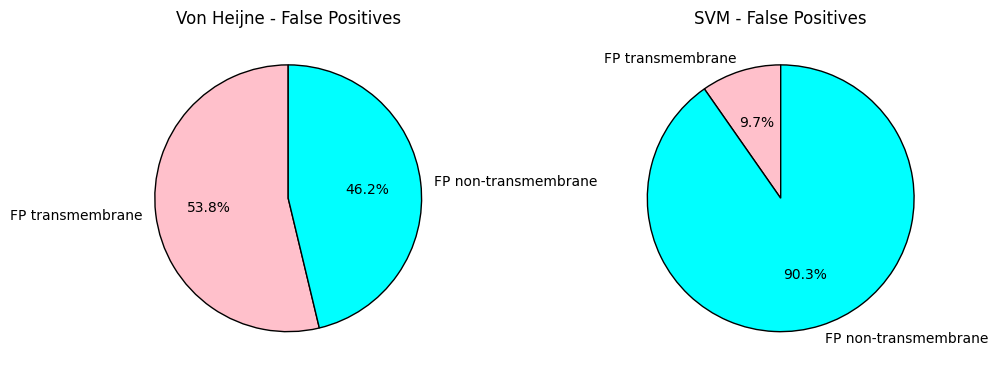

In [ ]:
# FP non transmembrane
FP_vH_notm = FP_vH - FP_vH_tm
FP_svm_notm = FP_svm - FP_svm_tm

labels = ['FP transmembrane', 'FP non-transmembrane']
sizes_vh = [FP_vH_tm, FP_vH_notm]
sizes_svm = [FP_svm_tm, FP_svm_notm]
colors = ['pink', 'cyan']


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Von Heijne ---
axes[0].pie(
    sizes_vh,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Von Heijne - False Positives')

# --- SVM ---
axes[1].pie(
    sizes_svm,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
axes[1].set_title('SVM - False Positives')

# Aggiusta layout e mostra
plt.tight_layout()
plt.show()

### **SAVING ALL RESULTS IN A FILE**

In [ ]:
with open('FalsePositive_analysis.txt','w')as write:
  print(f'Confusion matrix von Heijne method:\n {cm_vH}\nFP: {FP_vH}\nFN: {FN_vH}\n', file=write)
  print(f'Confusion matrix SVM method:\n {cm_svm}\nFP: {FP_svm}\nFN: {FN_svm}\n', file=write)
  print('----', file=write)
  print('Transmembrane proteins (von Heijne):', vonHeijne_tm.shape, file=write)
  print('Transmembrane proteins (svm):', svm_tm.shape, file=write)
  print('\n----\n', file=write)
  print(f'von Heijne Method:\n Overall False Positive Rate: {OPR_vH*100:.2f}%\n Transmembrane Positive Rate: {tm_PR_vH*100:.2f}%\n', file=write)
  print(f'SVM method:\n Overall False Positive Rate: {OPR_svm*100:.2f}%\n Transmembrane Positive Rate: {tm_PR_svm*100:.2f}%', file=write)
write.close

<function TextIOWrapper.close()>

## **VON HEIJNE ANALYSIS**
- FN: proteins labeled as class 1 but predicted as 0  
- TP: proteins labeled as class 1 and correctly predicted as 1

In [ ]:
#FN: Class=1, Prediction=0
FN_vh_df = vonHeijne[(vonHeijne['class'] == 1) & (vonHeijne['Prediction'] == 0)]
print('FN:', FN_vh_df.shape[0])

#TP: Class=1, Prediction=1
TP_vh_df = vonHeijne[(vonHeijne['class'] == 1) & (vonHeijne['Prediction'] == 1)]
print('TP:', TP_vh_df.shape[0])

FN: 60
TP: 159


This code extracts the signal peptide region from sequences corresponding to the **False Negatives (FN)** and **False Positives (FP)**of the von Heijne method.  
For each FN/FP sequence:  
- Match the sequence ID with the dataset  
- Retrieve the predicted signal peptide cleavage site  
- Extract the window around the cleavage site (−13 to +2)  
- Write the extracted fragment to a new FASTA-style file for sequence logo analysis  

In [ ]:
with open('positive.fasta', 'r') as read:
  with open('vh_FN_logo.seq', 'w') as write:
    for line in read:
      if '>' in line:
        line = line[1:].rstrip()
        query = FN_vh_df.query("seq_id == @line")['SP cleavage']
        if not query.empty:
          end = int(query.iloc[0])
          line = read.readline()
          print(line[end-13:end+2], file=write)

In [ ]:
with open('positive.fasta', 'r') as read:
  with open('vh_TP_logo.seq', 'w') as write:
    for line in read:
      if '>' in line:
        line = line[1:].rstrip()
        query = TP_vh_df.query("seq_id == @line")['SP cleavage']
        if not query.empty:
          end = int(query.iloc[0])
          line = read.readline()
          print(line[end-13:end+2], file=write)

### **CREATION OF LOGO SEQUENCES FOR BOTH FP AND FN**
To better understand which amino acid positions may contribute to misclassification, we generate two sequence logos: one from the False Positives and one from the False Negatives. These logos highlight conserved or enriched residues around the predicted cleavage sites, allowing us to identify amino acids or motifs that might influence the classifier's errors.



In [ ]:
!pip install logomaker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 119.7 MB/s eta 0:00:00


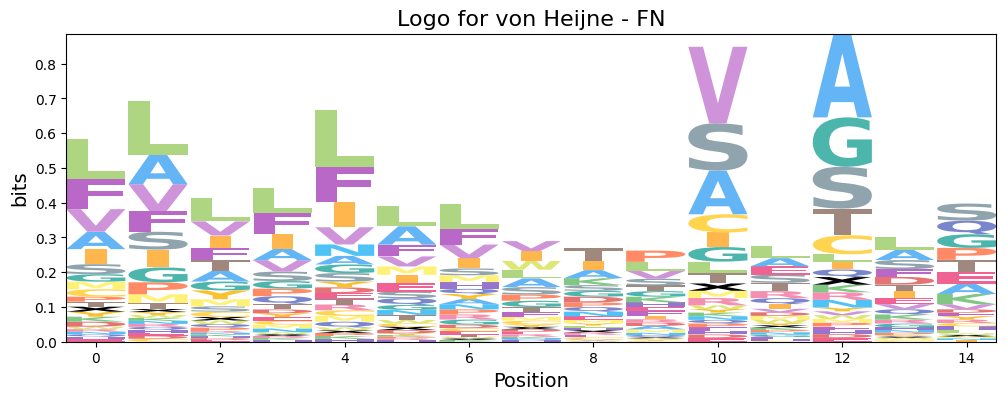

------------------------------------------------------------------------------------------------------------------------------------


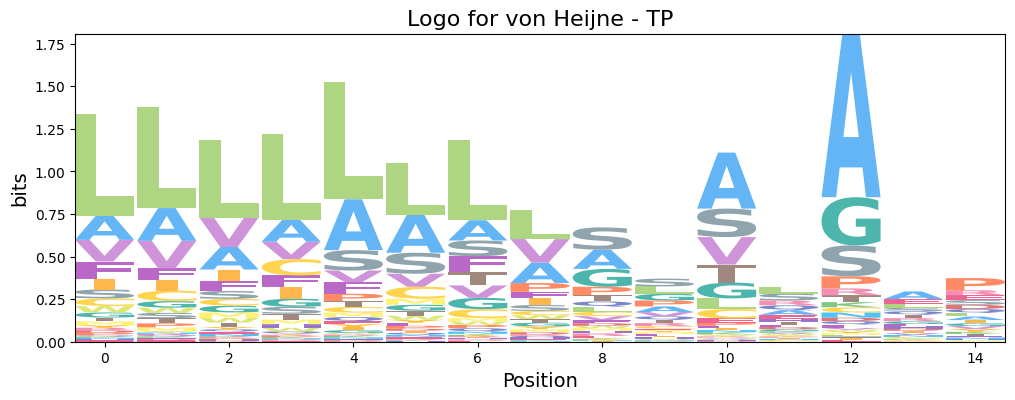

In [ ]:
import logomaker
import warnings

with open("vh_FN_logo.seq") as FN:
    sequences_FN = [line.strip() for line in FN if line.strip()]

with open("vh_TP_logo.seq") as TP:
    sequences_TP = [line.strip() for line in TP if line.strip()]


# Create a frequency matrix from the sequences
counts_mat_FN = logomaker.alignment_to_matrix(sequences=sequences_FN, to_type='information')
counts_mat_TP = logomaker.alignment_to_matrix(sequences=sequences_TP, to_type='information')


# Draw the sequence logo
aa_colors = {
    'A':'#64B5F6', 'C':'#FFD54F', 'D':'#E57373', 'E':'#F06292',
    'F':'#BA68C8', 'G':'#4DB6AC', 'H':'#9575CD', 'I':'#FFB74D',
    'K':'#81C784', 'L':'#AED581', 'M':'#FFF176', 'N':'#4FC3F7',
    'P':'#FF8A65', 'Q':'#7986CB', 'R':'#F48FB1', 'S':'#90A4AE',
    'T':'#A1887F', 'V':'#CE93D8', 'W':'#DCE775', 'Y':'#FBC02D',
    'X':'#000000' # X for unknow residues
}

fig1, ax1 = plt.subplots(figsize=(12, 4))
logo_FN = logomaker.Logo(
    counts_mat_FN,
    ax=ax1,
    shade_below=.5,
    fade_below=.5,
    color_scheme=aa_colors
)
ax1.set_title("Logo for von Heijne - FN", fontsize=16)
ax1.set_ylabel("bits", fontsize=14)
ax1.set_xlabel("Position", fontsize=14)
fig1.savefig("vh_FN_logo.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close(fig1)

# === LOGO TP ===
fig2, ax2 = plt.subplots(figsize=(12, 4))
logo_TP = logomaker.Logo(
    counts_mat_TP,
    ax=ax2,
    shade_below=.5,
    fade_below=.5,
    color_scheme=aa_colors
)
ax2.set_title("Logo for von Heijne - TP", fontsize=16)
ax2.set_ylabel("bits", fontsize=14)
ax2.set_xlabel("Position", fontsize=14)
fig2.savefig("vh_TP_logo.png", dpi=300, bbox_inches="tight")
print('-' *132)
plt.show()
plt.close(fig2)

## **SVM ANALYSIS**
- FN: proteins labeled as class 1 but predicted as 0  
- TP: proteins labeled as class 1 and correctly predicted as 1

In [ ]:
#FN: Class=1, Prediction=0
FN_svm_df = svm[(svm['class'] == 1) & (svm['Prediction'] == 0)]
print('FN:', FN_svm_df.shape[0])

#TP: Class=1, Prediction=1
TP_svm_df = svm[(svm['class'] == 1) & (svm['Prediction'] == 1)]
print('TP:', TP_svm_df.shape[0])

FN: 23
TP: 196


### **RESIDUES COMPOSITION ANALYSIS**
The comparison is made between:
- svm_pos_train_df --> file of all pos_bench SP sequences used during SVM benchmarking
- TP_svm_df --> dataframe of all SP seqeunces labeled as TP
- FN_svm_df --> dataframe of all SP sequences labeled as FN

This quantitative analysis reveals broader trends that are not position-specific; for example, differences in overall hydrophobicity or enrichment of specific residues. A bar plot of the composition difference (Pos_bench – TP – FN) highlights which amino acids are over- or under-represented in correctly vs. incorrectly predicted signal peptides, helping us interpret model weaknesses and sequence features that influence prediction accuracy.

In [ ]:
# Upload the dataframe
#col = ['ID','Set','Class','Sequence','G','A','V','P','L','I','M','F','W','Y','S','T','C','N','Q','H','D','E','K','R','X','hp_max','hp_mean','ah_max','ah_mean','tm_max','tm_mean','ch_max','ch_pos']
col = ['seq_id', 'class', 'Sequence']
svm_pos_train_df = pd.read_csv('svm_pos_test.tsv', sep='\t', header=None, names=col)

#Calculate the composition
tot = 0
aa_pos_train = {}
for index, row in svm_pos_train_df.iterrows():
    seq = row['Sequence'][:22]
    for char in seq:
      tot += 1
      aa_pos_train[char] = aa_pos_train.get(char, 0) + 1

print(tot)
print(22*(svm_pos_train_df.shape[0]))
print('\n')

print('Residue frequency among positive sequences:')
for k in aa_pos_train.keys():
  aa_pos_train[k] = round((aa_pos_train[k]/(tot))*100,2)
  print(k,aa_pos_train[k])


4818
4818


Residue frequency among positive sequences:
M 6.54
A 14.01
G 5.02
L 21.96
S 7.62
R 2.89
T 4.42
W 1.62
F 5.67
P 3.96
H 1.25
I 4.09
C 2.93
E 1.7
V 8.05
D 1.35
Q 2.32
K 2.37
N 1.04
Y 1.0
X 0.21


In [ ]:
with open('positive.fasta', 'r') as read:
  for line in read:
    if '>' in line:
      line = line[1:].rstrip()
      query = TP_svm_df.query("seq_id == @line")['SP cleavage']
      if not query.empty:
        end = int(query.iloc[0])
        next_line = read.readline().strip()
        TP_svm_df.loc[TP_svm_df['seq_id'] == line, 'Sequence'] = next_line[end-13:end+2]


tot = 0
aa_TP = {}
for index, row in TP_svm_df.iterrows():
    seq = row['Sequence']
    for char in seq:
      tot += 1
      aa_TP[char] = aa_TP.get(char, 0) + 1

print(tot)
print(15*(TP_svm_df.shape[0]))
print('\n')

print('Residue frequency among TP sequences:')

for k in aa_TP.keys():
  aa_TP[k] = round((aa_TP[k]/tot)*100,2)
  print(k,aa_TP[k])

/tmp/ipython-input-2243950708.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TP_svm_df.loc[TP_svm_df['seq_id'] == line, 'Sequence'] = next_line[end-13:end+2]


2940
2940


Residue frequency among TP sequences:
I 3.64
Y 1.09
C 3.23
W 1.12
A 16.36
T 4.05
P 4.05
F 5.03
L 23.2
M 1.7
V 8.5
E 2.41
Q 2.76
S 9.08
N 1.05
H 1.19
G 6.22
R 2.21
D 1.77
K 1.05
X 0.27


In [ ]:
with open('positive.fasta', 'r') as read:
  for line in read:
    if '>' in line:
      line = line[1:].rstrip()
      query = FN_svm_df.query("seq_id == @line")['SP cleavage']
      if not query.empty:
        end = int(query.iloc[0])
        next_line = read.readline().strip()
        FN_svm_df.loc[FN_svm_df['seq_id'] == line, 'Sequence'] = next_line[end-13:end+2]

tot = 0
aa_FN = {}
for index, row in FN_svm_df.iterrows():
    seq = row['Sequence']
    for char in seq:
      tot += 1
      aa_FN[char] = aa_FN.get(char, 0) + 1

#print('Compare number of residues between all sequnces of training set and expected with SP cleavege fixed lenght of 15')
print(tot)
print(15*(FN_svm_df.shape[0]))
print('\n')

print('Residue frequency among FN sequences:')
for k in aa_FN.keys():
  aa_FN[k] = round((aa_FN[k]/tot)*100,2)
  print(k,aa_FN[k])


/tmp/ipython-input-3022116682.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FN_svm_df.loc[FN_svm_df['seq_id'] == line, 'Sequence'] = next_line[end-13:end+2]


345
345


Residue frequency among FN sequences:
F 5.8
I 7.25
L 20.0
W 2.61
T 7.83
S 8.12
E 3.19
A 15.94
N 1.16
V 7.83
K 1.45
P 2.9
G 5.22
R 1.74
C 2.9
Q 2.61
Y 1.45
M 1.74
H 0.29


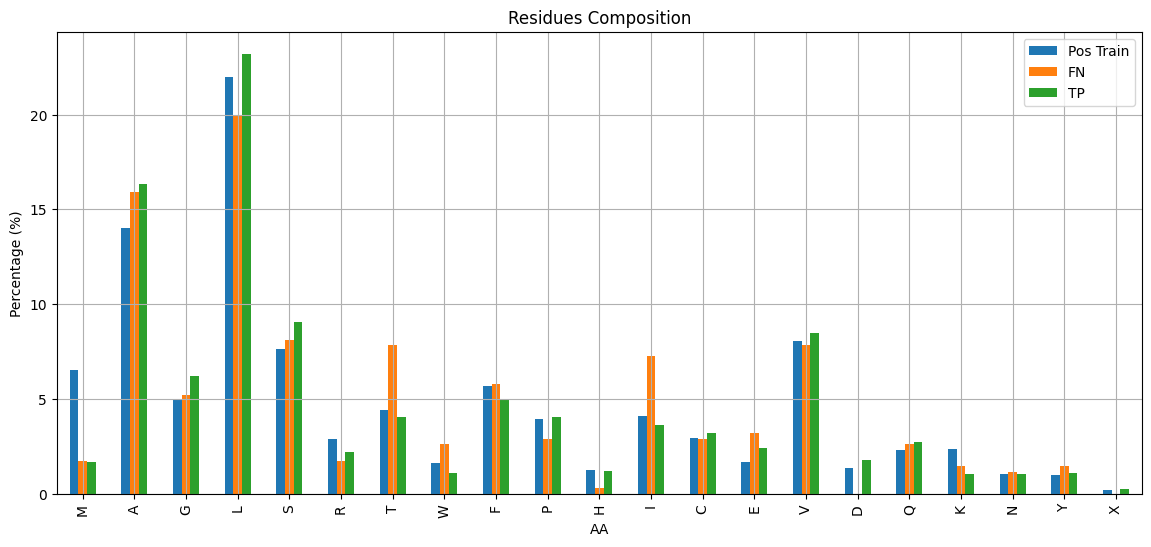

In [ ]:
# Store in a DataFrame
aa_order = list(aa_pos_train.keys())  # standard AA order
df = pd.DataFrame({
    'AA': aa_order,
    'Pos Train': [aa_pos_train.get(k, 0) for k in aa_order],
    'FN': [aa_FN.get(k, 0) for k in aa_order],
    'TP': [aa_TP[k] for k in aa_order]
})

# Generate the plot

fig, ax = plt.subplots(figsize=(14,6))
df.set_index('AA').plot(kind='bar', ax=ax)
ax.set_ylabel("Percentage (%)")
ax.set_title("Residues Composition")
ax.grid(True)
ax.legend()

fig.savefig("residues_composition.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close(fig)

### **DENSITY DISTRIBUTION OF SP LENGTHS**


In [ ]:
# Concat datafames of pos_test, TP_svm and FN_svm adding 'Type' column

pos_train = pd.read_csv('pos_train.tsv', sep='\t')
pos_train['class'] = pos_train['class'].map({'positive': 1, 'negative': 0}).astype(int)

pos_test_filt = pos_train[['seq_id', 'SP cleavage', 'class']]
pos_test_filt.loc[:, ['Type']] = 'Train'

print(pos_test_filt.shape)
print(pos_test_filt.head())

TP_svm_df_filt = TP_svm_df[['seq_id', 'SP cleavage']]
FN_svm_df_filt = FN_svm_df[['seq_id', 'SP cleavage']]

TP_svm_df_filt.loc[:, ['Type']] = 'TP'
FN_svm_df_filt.loc[:, ['Type']] = 'FN'

print(TP_svm_df_filt.shape)
print(TP_svm_df_filt.head())

print(FN_svm_df_filt.shape)
print(FN_svm_df_filt.head())

(874, 4)
   seq_id  SP cleavage  class   Type
0  P13598           24      1  Train
1  Q96HE7           23      1  Train
2  Q13651           21      1  Train
3  P04937           24      1  Train
4  P68248           25      1  Train
(196, 3)
   seq_id  SP cleavage Type
0  Q62598         17.0   TP
1  P67788         19.0   TP
2  Q8TD06         21.0   TP
3  Q99372         27.0   TP
4  P06865         22.0   TP
(23, 3)
    seq_id  SP cleavage Type
6   B1P0S1         23.0   FN
14  P09586         31.0   FN
30  P04217         21.0   FN
33  P01033         23.0   FN
55  P22388         25.0   FN


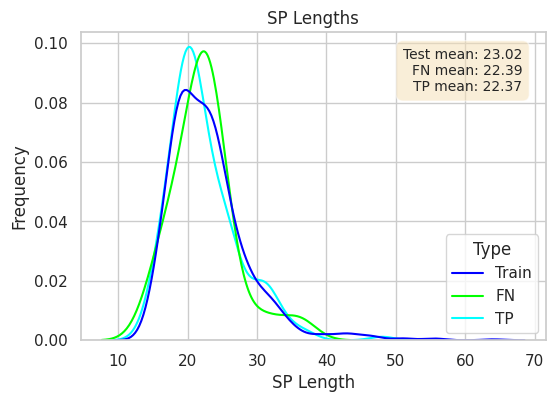

In [ ]:
df_tot = pd.concat([pos_test_filt, FN_svm_df_filt, TP_svm_df_filt], axis=0)

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

# Convert 'SP cleavage' to numeric, coercing errors
df_tot['SP cleavage'] = pd.to_numeric(df_tot['SP cleavage'], errors='coerce')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")
custom_palette=['blue','lime','cyan','pink','purple','magenta', '#7FFFD4', '#550A35']

# Plot the distribution of protein lengths
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_tot, common_norm=False, x='SP cleavage', hue='Type', palette=custom_palette)

# Add title and labels
plt.title('SP Lengths')
plt.xlabel('SP Length')
plt.ylabel('Frequency')

# Calculate the mean SP cleavage for each group
mean_sp_cleavage = df_tot.groupby('Type')['SP cleavage'].mean()

# Create a text box with the mean values
textstr = '\n'.join((
    f"Test mean: {mean_sp_cleavage['Train']:.2f}",
    f"FN mean: {mean_sp_cleavage['FN']:.2f}",
    f"TP mean: {mean_sp_cleavage['TP']:.2f}"))

# Add the text box to the plot
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

# Show the plot
plt.show()



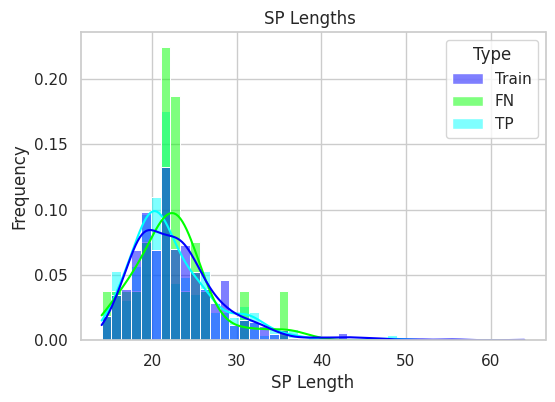

In [ ]:
# Compare Lenght distribution

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the distribution of protein lengths
plt.figure(figsize=(6, 4))
sns.histplot(df_tot, kde=True, stat='density', common_norm=False, x='SP cleavage', hue='Type', palette=custom_palette )

# Add title and labels
plt.title('SP Lengths ')
plt.xlabel('SP Length')
plt.ylabel('Frequency')


fig.savefig("SP_lengths.png", dpi=300, bbox_inches="tight")
plt.show()

plt.close(fig)


### **KINGDOM DISTRIBUTION IN THE TWO MODELS**
The pie chart compares the distribution of sequences across kingdoms for the von Heijne and SVM methods.  

- **Metazoa** is the dominant kingdom in both models, reflecting that signal peptides (SPs) are most abundant in multicellular animals due to their extensive secretion and protein targeting needs.  
- **Viridiplantae** are also represented; many SPs in plants direct proteins to **chloroplasts**, which explains their presence.  
- **Fungi** appear with a smaller fraction, with SVM capturing slightly more sequences, likely due to similarities in SP features across eukaryotes.  

**Biological context:**  
Signal peptides direct proteins to the secretory pathway, which is particularly active in Metazoa for tissue-specific secretion, cell signaling, and extracellular matrix formation. This explains their prevalence in the dataset.


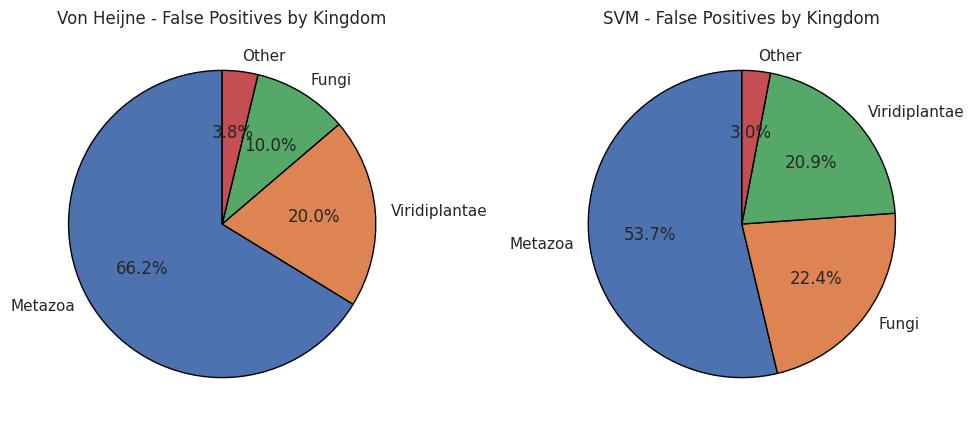

In [ ]:
#FP: Class=0, Prediction=1
FP_vh_df = vonHeijne[(vonHeijne['class'] == 0) & (vonHeijne['Prediction'] == 1)]
FP_svm_df = svm[(svm['class'] == 0) & (svm['Prediction'] == 1)]

counts_vh = FP_vh_df['Kingdom'].value_counts()
counts_svm = FP_svm_df['Kingdom'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Pie chart Von Heijne ---
axes[0].pie(
    counts_vh,
    labels=counts_vh.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Von Heijne - False Positives by Kingdom')

# --- Pie chart SVM ---
axes[1].pie(
    counts_svm,
    labels=counts_svm.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
axes[1].set_title('SVM - False Positives by Kingdom')

# Migliora spaziatura
plt.tight_layout()
plt.show()

### **DISTRIBUTION OF THE 10 MOST IMPORTANT FEATURES OF FN IN SVM**

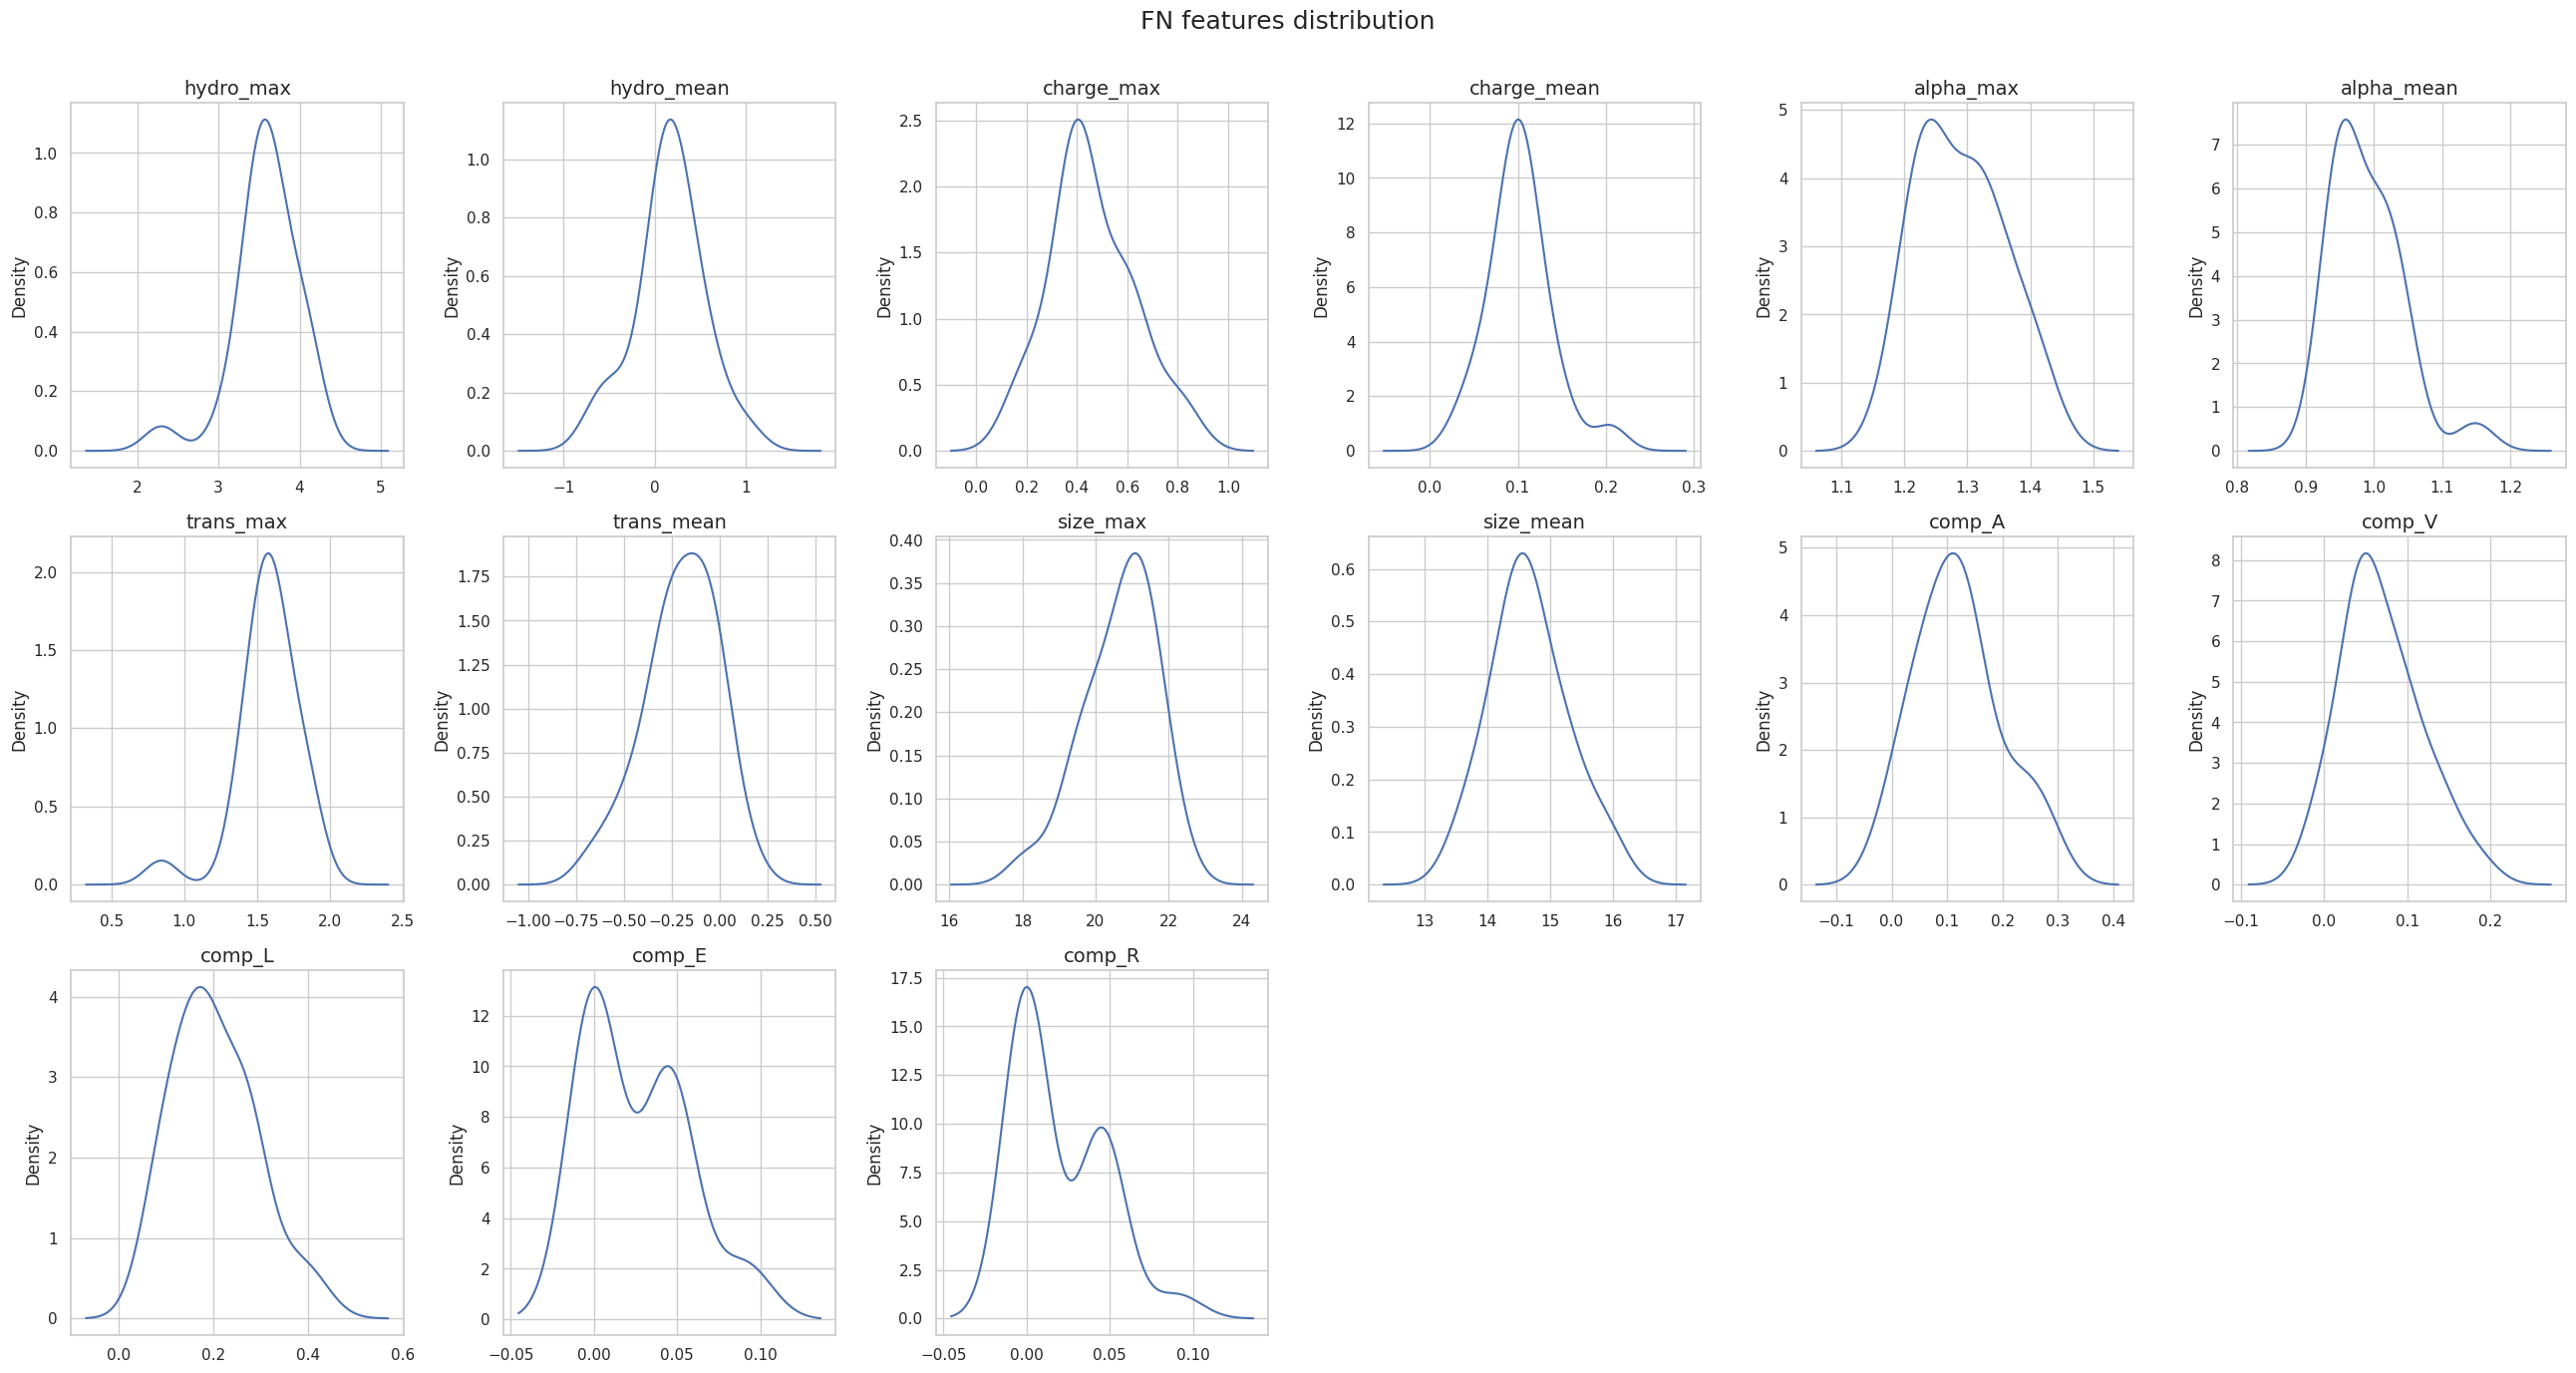

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(26, 26))
axes = axes.flatten()

features = ['hydro_max', 'hydro_mean', 'charge_max', 'charge_mean', 'alpha_max', 'alpha_mean', 'trans_max', 'trans_mean', 'size_max', 'size_mean', 'comp_A', 'comp_V', 'comp_L', 'comp_E', 'comp_R']

for i, feature in enumerate(features):
    if i < len(axes):
        FN_svm_df[feature].plot(kind='density', ax=axes[i])
        axes[i].set_title(feature, fontsize=14)
        axes[i].legend().remove()

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('FN features distribution',  y=1.02, fontsize=18)
plt.show()

### **DISTRIBUTION OF THE TOP 10 MOST IMPORTANT FEATURES OF TP IN SVM**

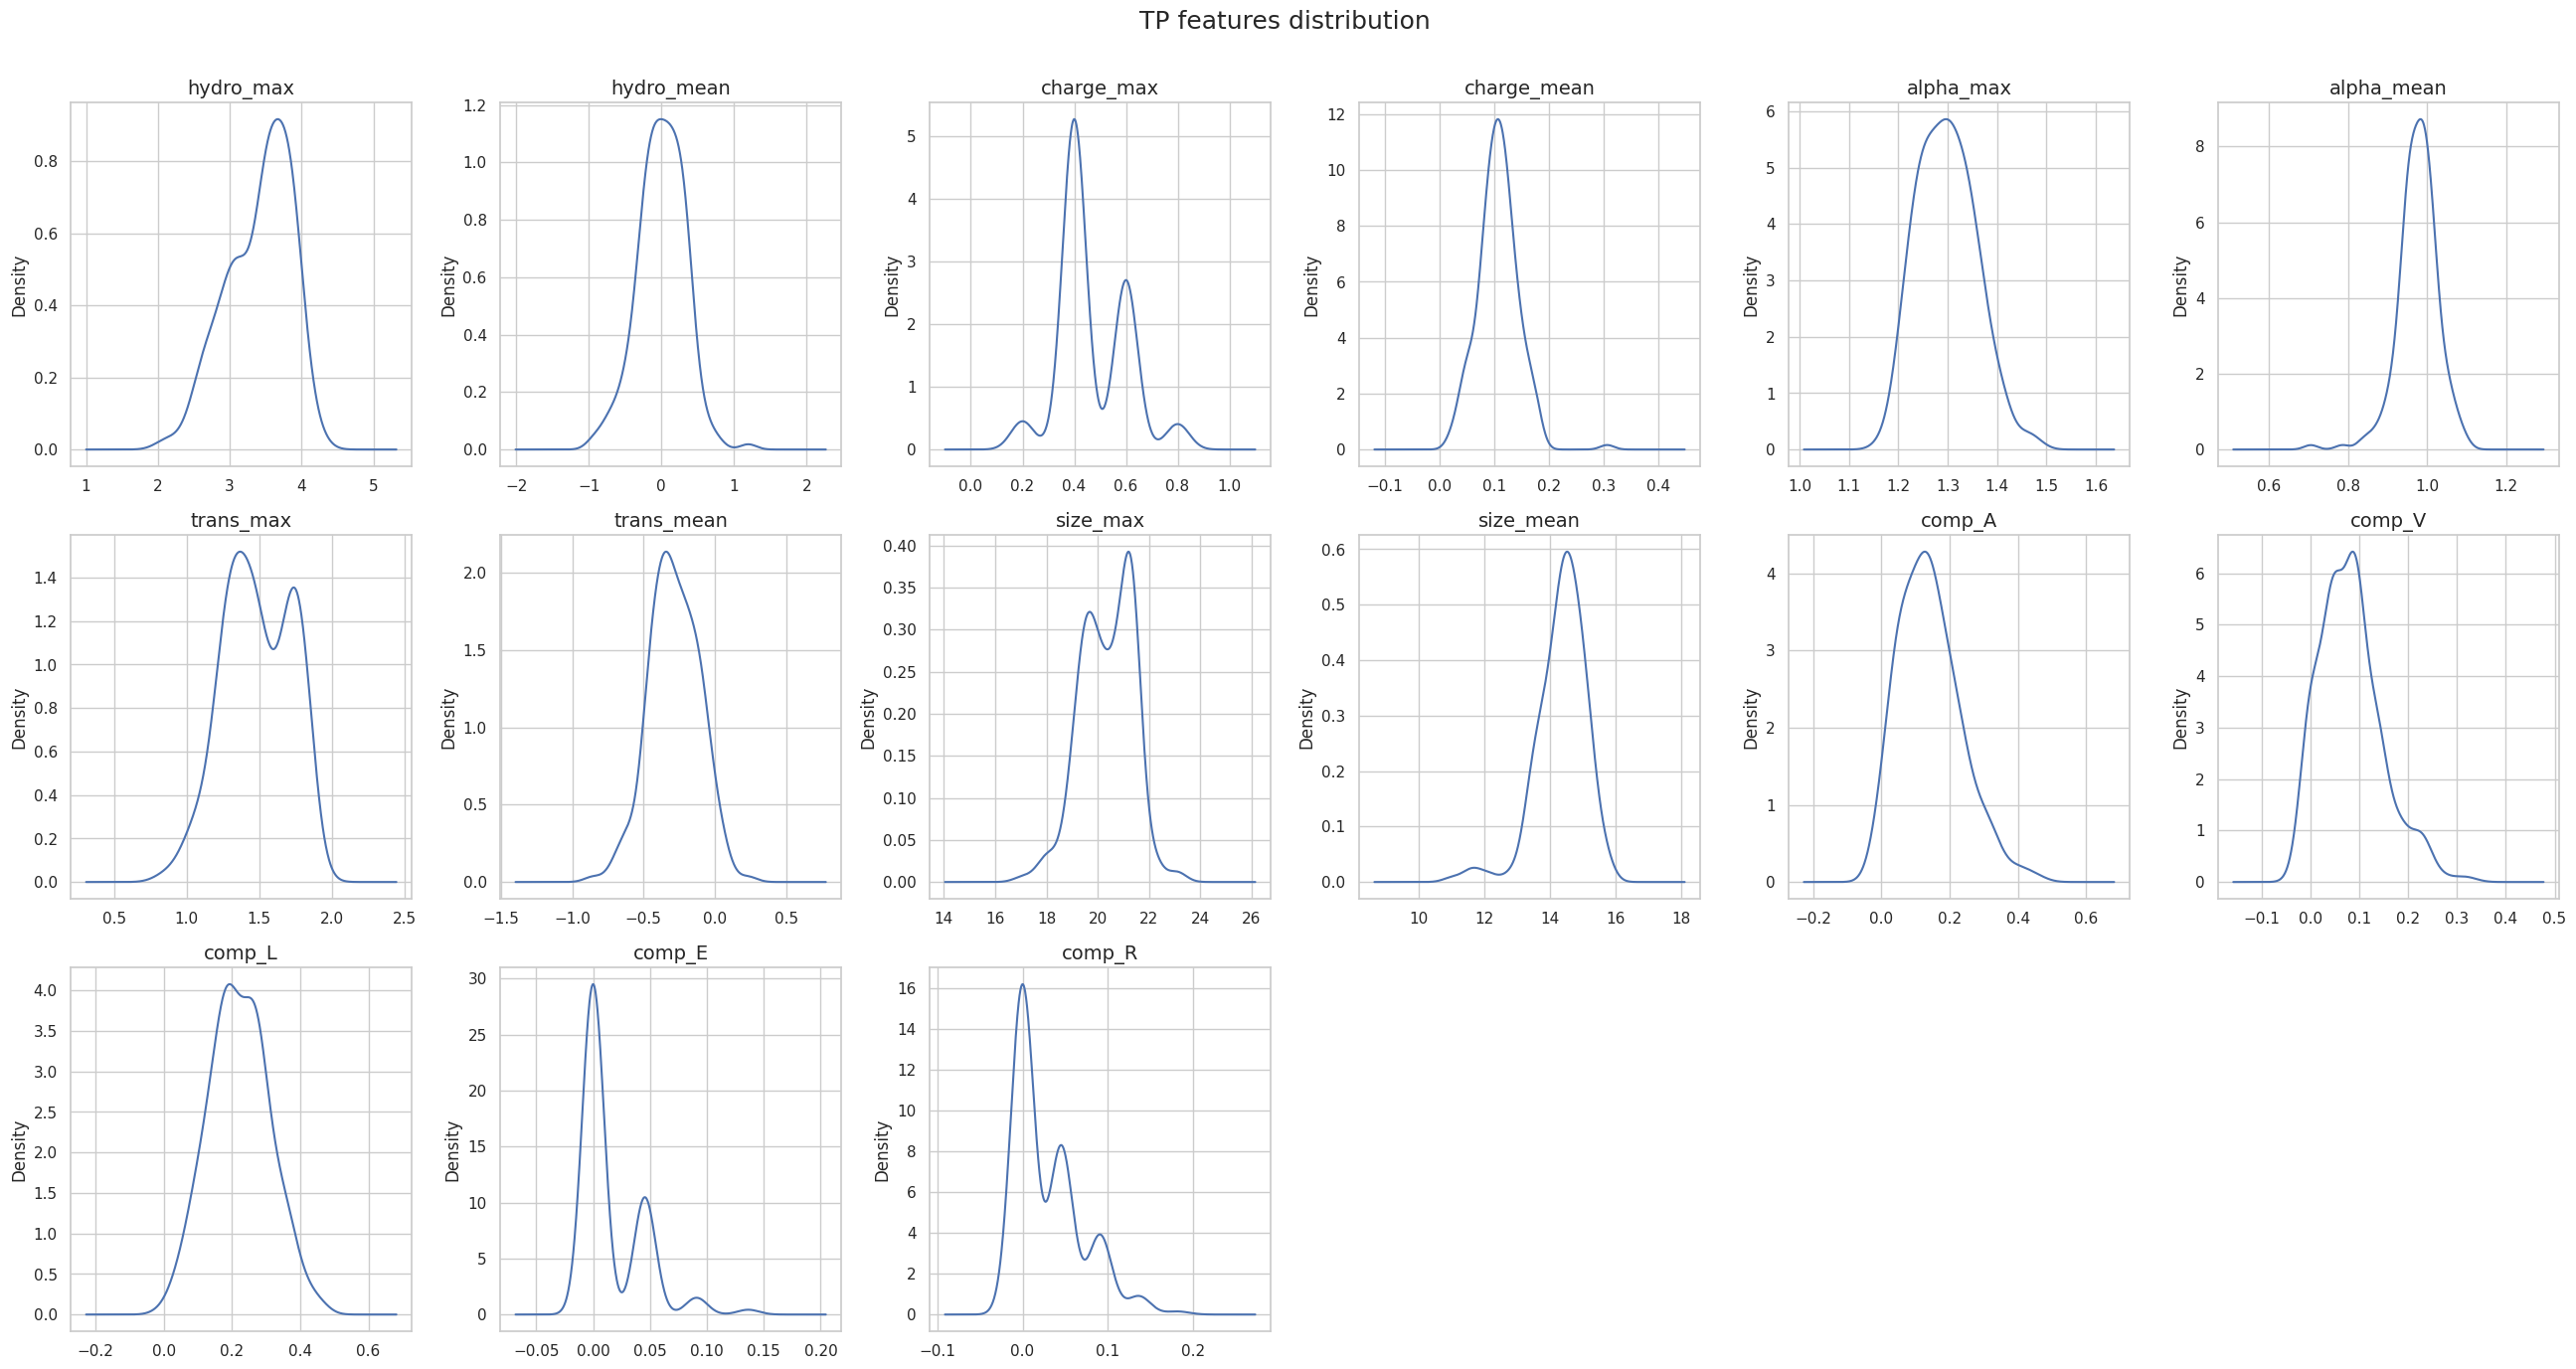

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(26, 26))
axes = axes.flatten()

features = ['hydro_max', 'hydro_mean', 'charge_max', 'charge_mean', 'alpha_max', 'alpha_mean', 'trans_max', 'trans_mean', 'size_max', 'size_mean', 'comp_A', 'comp_V', 'comp_L', 'comp_E', 'comp_R']

for i, feature in enumerate(features):
    if i < len(axes):
        TP_svm_df[feature].plot(kind='density', ax=axes[i])
        axes[i].set_title(feature, fontsize=14)
        axes[i].legend().remove()

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('TP features distribution',  y=1.02, fontsize=18)
plt.show()


### **FEATURES COMPARISON BETWEEN TP AND FN IN SVM**

This plot compares the distribution of selected features for True Positives (TP) and False Negatives (FN) in the SVM model.  
Features analyzed:
- **Charge Average / Max**: overall and maximal amino acid charge in the sequence  
- **Transmembrane Propensity Average / Max**: likelihood of forming transmembrane regions  

The comparison helps identify patterns in misclassified sequences and highlights which properties might distinguish FN from TP.


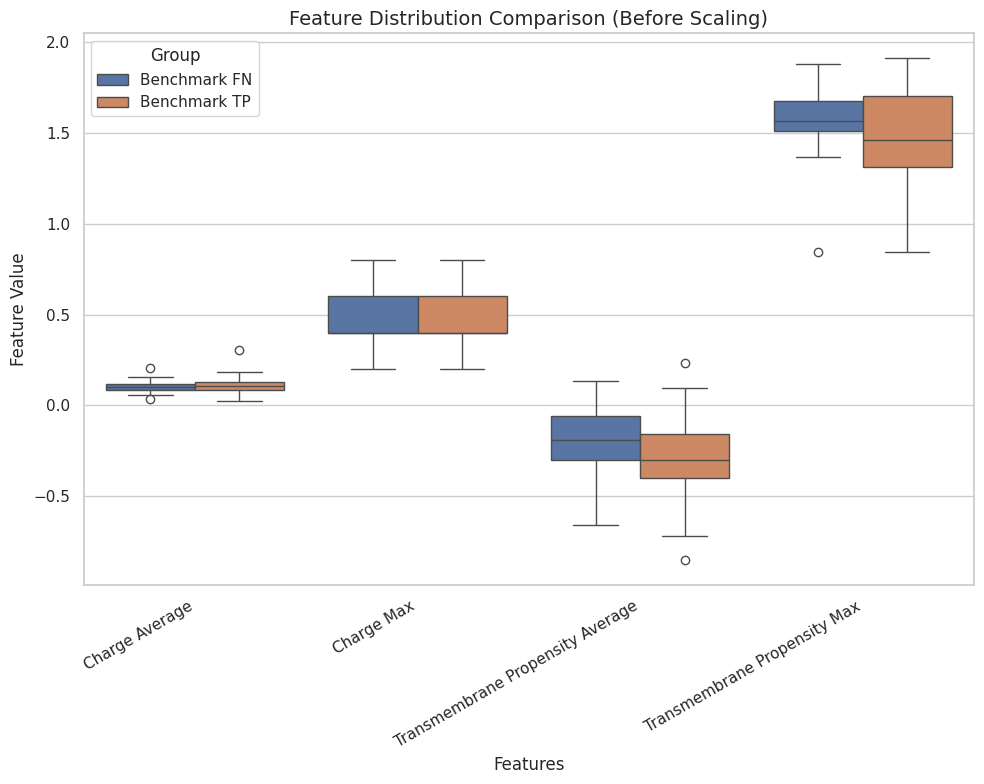

In [ ]:
# Select features to compare
features = ["charge_mean", "charge_max", "trans_mean", "trans_max"]

# Assign group labels
FN_svm_df['Group'] = 'Benchmark FN'
TP_svm_df['Group'] = 'Benchmark TP'

# Combine FN and TP data for plotting
df = pd.concat([FN_svm_df[features + ["Group"]],
                TP_svm_df[features + ["Group"]]], ignore_index=True)

# Convert to long format for seaborn
df_long = df.melt(id_vars="Group", value_vars=features,
                  var_name="Feature", value_name="Value")

# Map feature names to more readable labels
label_map = {
    "charge_mean": "Charge Average",
    "charge_max": "Charge Max",
    "trans_mean": "Transmembrane Propensity Average",
    "trans_max": "Transmembrane Propensity Max",
}
df_long["Feature"] = df_long["Feature"].map(label_map)

# Define order for x-axis
order = [label_map[f] for f in features]

# Plot boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_long, x="Feature", y="Value", hue="Group")

plt.title("Feature Distribution Comparison (Before Scaling)", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Feature Value", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.legend(title="Group")
plt.tight_layout()
plt.show()
